In [1]:
is_colab = 'google.colab' in str(get_ipython())

In [2]:
if is_colab:
    !git clone https://github.com/davidfague/Neural-Modeling.git
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/

In [3]:
if is_colab:
    %cd /content/Neural-Modeling

import numpy as np
import matplotlib.pyplot as plt
from Modules.segment import SegmentManager
from Modules.plotting_utils import plot_sta

In [4]:
random_state = np.random.RandomState(123)

In [5]:
output_folder = 'L5PCtemplate[0]_115e-1Hz_642nseg_2000ms_108nbranch_29068NCs_29068nsyn'
dt = 0.1

sm = SegmentManager(output_folder, dt = dt)

In [6]:
threshold = 0.003 / 1000
ms_within_somatic_spike = 2

sm.get_na_lower_bounds_for_seg(sm.segments[0], threshold, ms_within_somatic_spike)

array([19908])

In [7]:
na_lower_bounds, peak_values, flattened_peak_values = sm.get_na_lower_bounds_and_peaks(threshold, ms_within_somatic_spike)

/Users/vladimiromelyusik/Neural-Modeling/Modules/segment.py:169: UserWarning: Skipped 1 indicies, since they exceeded the data length.
  warnings.warn(warining_text)


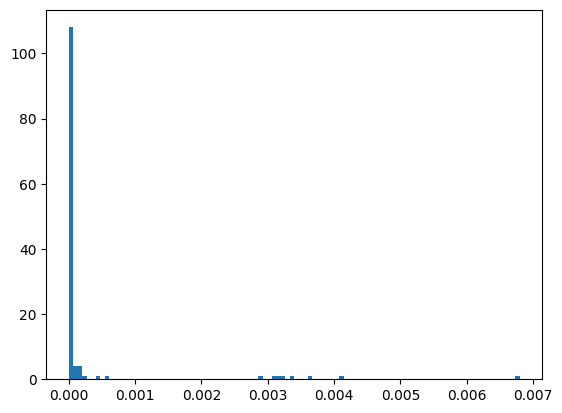

In [8]:
plt.hist(np.array(flattened_peak_values), bins = 100);

In [9]:
edges_dend = sm.get_edges(na_lower_bounds, "dend")
edges_apic = sm.get_edges(na_lower_bounds, "apic")

In [10]:
na_dend = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_dend, "dend")
na_apic = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_apic, "apic")

In [11]:
rand_spktimes = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
na_dend_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_dend, "dend")
na_apic_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_apic, "apic")

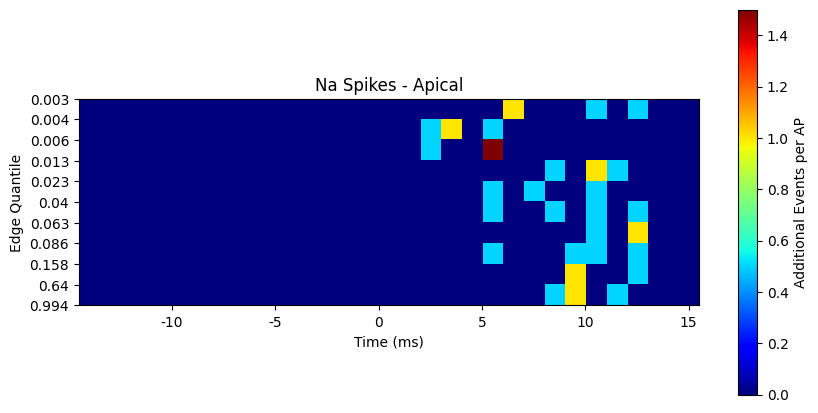

In [12]:
to_plot = (na_apic - na_apic_rand) / len(sm.soma_spiketimes)
title = 'Na Spikes - Apical'
x_ticks = np.arange(0, 40, 5)
x_tick_labels = ['{}'.format(i) for i in np.arange(-20, 20, 5)]
xlim = (5, 35)
plot_sta(to_plot, edges_apic, title, x_ticks, x_tick_labels, xlim)

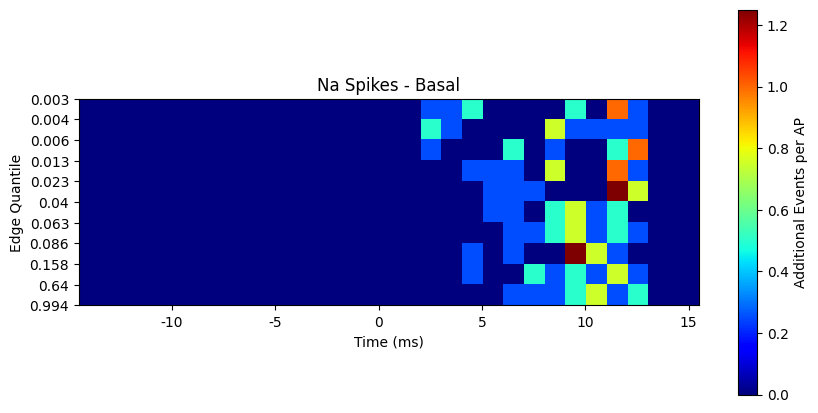

In [13]:
to_plot = (na_dend - na_dend_rand) / len(sm.soma_spiketimes)
title = 'Na Spikes - Basal'
x_ticks = np.arange(0, 40, 5)
x_tick_labels = ['{}'.format(i) for i in np.arange(-20, 20, 5)]
xlim = (5, 35)
plot_sta(to_plot, edges_apic, title, x_ticks, x_tick_labels, xlim)

In [14]:
lowery, uppery = 500, 1500

In [15]:
ca_lower_bounds, _, _, _, _, _ = sm.get_ca_nmda_lower_bounds_durations_and_peaks(lowery = lowery, 
                                                                                 uppery = uppery, 
                                                                                 random_state = random_state)

In [16]:
edges_ca = sm.get_edges(ca_lower_bounds)
ca_apic = sm.get_sta(sm.soma_spiketimes, ca_lower_bounds, edges_ca, "apic")
rand_spktimes = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
ca_apic_rand = sm.get_sta(rand_spktimes, ca_lower_bounds, edges_ca, "apic")

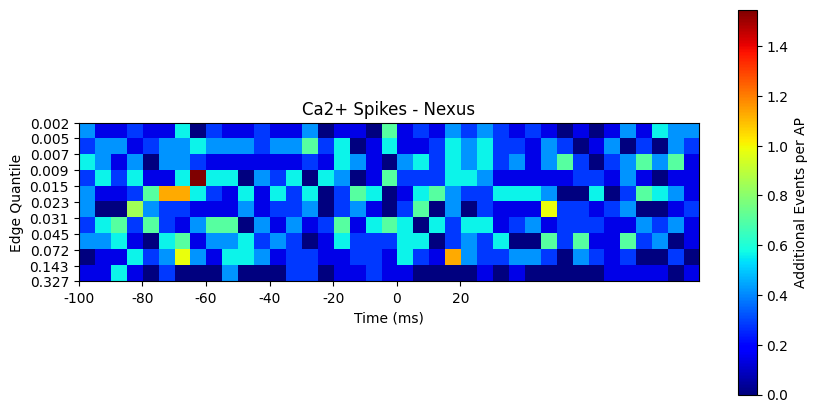

In [17]:
to_plot = (ca_apic - ca_apic_rand) / len(sm.soma_spiketimes)
title = 'Ca2+ Spikes - Nexus'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_ca, title, x_ticks, x_tick_labels, [])

In [18]:
nmda_lower_bounds, _, _, _, _, _ = sm.get_ca_nmda_lower_bounds_durations_and_peaks(lowery = None, 
                                                                                   uppery = None, 
                                                                                   random_state = random_state)

In [19]:
edges_nmda_apic = sm.get_edges(nmda_lower_bounds, "apic")
nmda_apic = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic")
rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
nmda_rand_apic = sm.get_sta(rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic")

In [20]:
edges_nmda_dend = sm.get_edges(nmda_lower_bounds, "dend")
nmda_dend = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend")
rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
nmda_rand_dend = sm.get_sta(rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend")

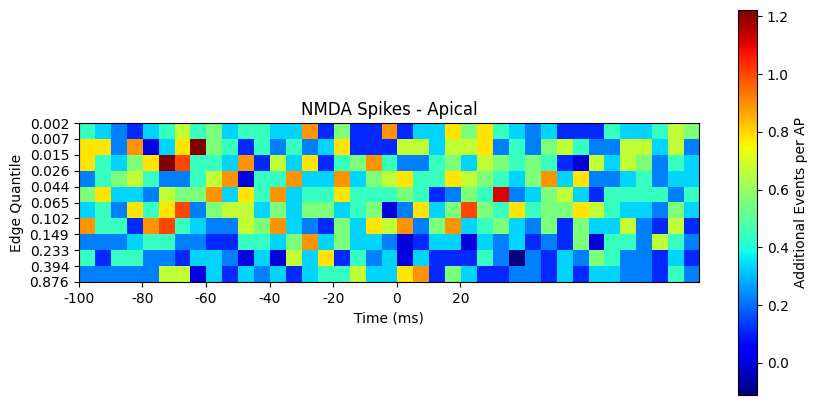

In [21]:
to_plot = (nmda_apic - nmda_rand_apic) / len(sm.soma_spiketimes)
title = 'NMDA Spikes - Apical'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

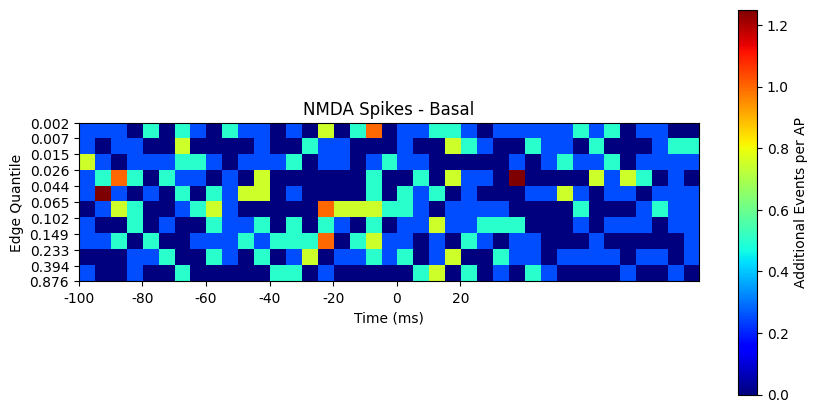

In [22]:
to_plot = (nmda_dend-nmda_rand_dend) / len(sm.soma_spiketimes)
title = 'NMDA Spikes - Basal'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

In [180]:
ca_spiketimes = []
for ind, i in enumerate(ca_lower_bounds):
    if (len(i) > 0) & ('apic[50]' in sm.segments[ind].sec):
        ca_spiketimes.extend(i.tolist())

ca_spiketimes = np.sort(ca_spiketimes) * dt
ca_spiketimes = ca_spiketimes[1:][np.diff(ca_spiketimes) > 100] # This condition is from Ben's code. It's supposed to remove duplicates.

In [182]:
ca_nmda_apic = sm.get_sta(ca_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic")
ca_rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, 150000), ca_spiketimes.shape[0]))
ca_nmda_rand_apic = sm.get_sta(ca_rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic")

ca_nmda_dend = sm.get_sta(ca_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend")
ca_rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, 150000), ca_spiketimes.shape[0]))
ca_nmda_rand_dend = sm.get_sta(ca_rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend")

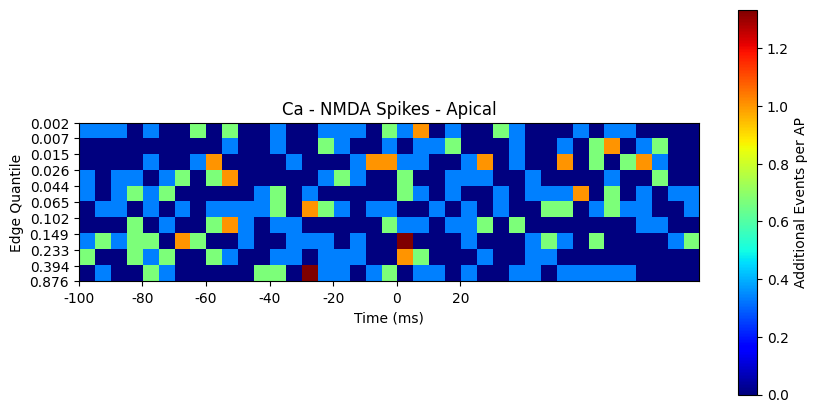

In [183]:
to_plot = (ca_nmda_apic - ca_nmda_rand_apic) / len(ca_spiketimes)
title = 'Ca - NMDA Spikes - Apical'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

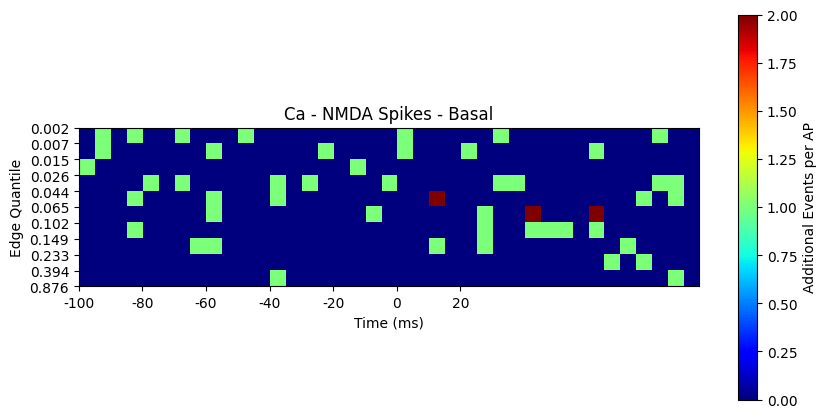

In [184]:
to_plot = (ca_nmda_dend - ca_nmda_rand_dend) / len(ca_spiketimes)
title = 'Ca - NMDA Spikes - Basal'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])